# Financial Analyst Agent for Annual Report Writing

In this demo, we introduce an agent that can analyze financial report.

In [5]:
import os
import autogen
from textwrap import dedent
from finrobot.utils import register_keys_from_json
from finrobot.agents.workflow import SingleAssistantShadow

import warnings
warnings.filterwarnings("ignore")


After importing all the necessary packages and functions, we also need the config for OpenAI & SecApi & FMPApi here. 
- for openai configuration, rename OAI_CONFIG_LIST_sample to OAI_CONFIG_LIST and replace the api keys
- for Sec_api & FMP_api configuration, rename config_api_keys_sample to config_api_keys and replace the api keys

In [6]:
llm_config = {
    "config_list": autogen.config_list_from_json(
        "../OAI_CONFIG_LIST",
        filter_dict={
            "model": ["gpt-4-0125-preview"],
        },
    ),
    "timeout": 120,
    "temperature": 0.5,
}
register_keys_from_json("../config_api_keys")

In [7]:
# Intermediate results will be saved in this directory
work_dir = "../report"
os.makedirs(work_dir, exist_ok=True)

assistant = SingleAssistantShadow(
    "Expert_Investor",
    llm_config,
    max_consecutive_auto_reply=None,
    human_input_mode="TERMINATE",
)

User_Proxy (to Expert_Investor):


With the tools you've been provided, write an annual report based on JP Morgan's 2024 10-k report, format it into a pdf.
Pay attention to the followings:
- Explicitly explain your working plan before you kick off.
- Use tools one by one for clarity, especially when asking for instructions. 
- All your file operations should be done in "../report". 
- Display any image in the chat once generated.
- All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.


--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

To create an annual report based on JP Morgan's 2024 10-K report, formatted into a PDF, I will follow a structured approach. Here's the working plan:

1. **Retrieve the 10-K Report:** Use the `get_sec_report` tool to obtain the URL and filing date of JP Morgan's 2024 10-K report. This step ensures we're working with the lates

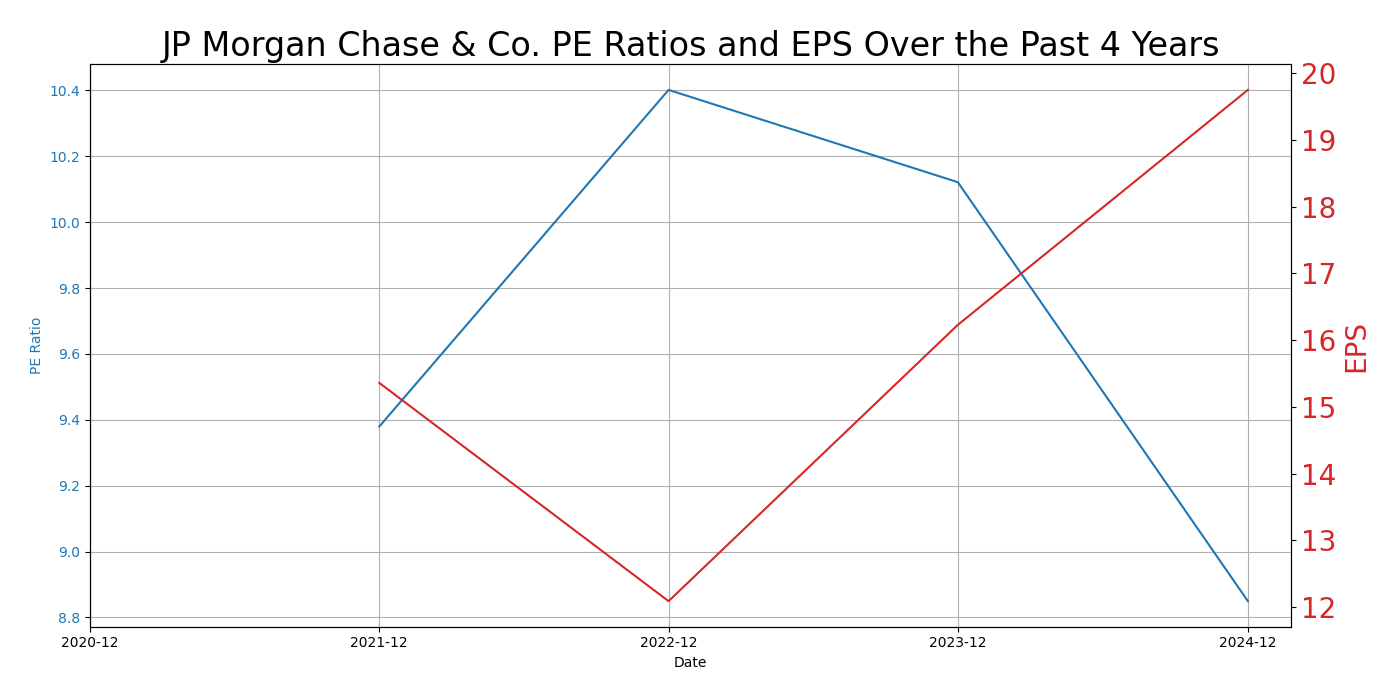

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_eSOV31WnzvlsYulqbJRWAEJ7) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The PE and EPS performance chart for JP Morgan has been successfully generated and is ready for inclusion in the annual report.

Next, I will generate the share performance chart, comparing JP Morgan's stock performance with the S&P 500 over the past year. This will provide a visual representation of how JP Morgan's stock has fared relative to the broader market index.
***** Suggested tool call (call_ix51HhQri1tnocHRxIDHuOZH): get_share_performance *****
Arguments: 
{"filing_date":"2024-02-16","save_path":"../report/JPM_share_performance.png","ticker_symbol":"JPM"}
**************************************************************************************

-------------------------------------------

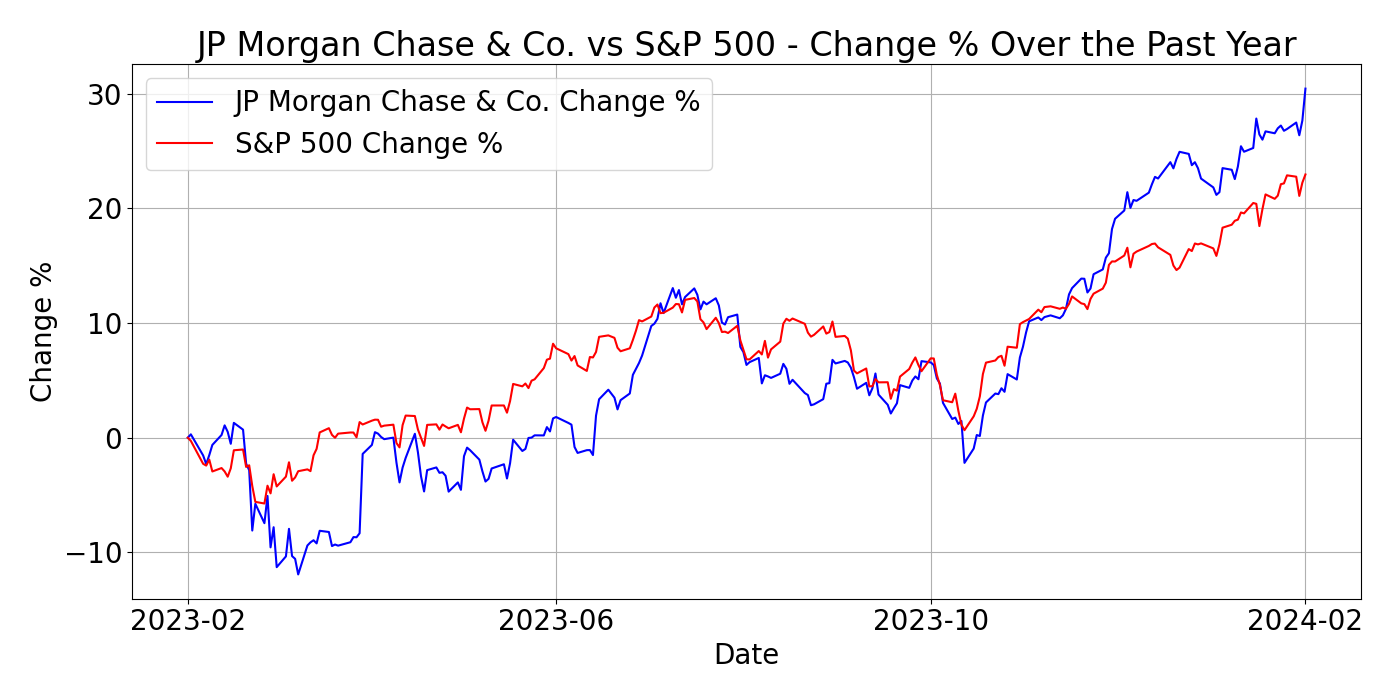

User_Proxy (to Expert_Investor):

***** Response from calling tool (call_vELZgYYkzi20OBi2QSOeHcTU) *****
None
**********************************************************************

--------------------------------------------------------------------------------
Expert_Investor (to User_Proxy):

The share performance chart for JP Morgan, comparing its stock performance with the S&P 500 over the past year, has been successfully generated and is ready for inclusion in the annual report.

With the performance charts prepared, we are now ready to compile the annual report. Before proceeding to the final step of compiling the report into a PDF, let's ensure all components are in place and meet the requirements:

- **Company Description, Business Highlights, Financial Analyses, and Risks:** The text combines into 447 words, fitting our specified range.
- **PE and EPS Performance Chart:** Generated and displayed.
- **Share Performance Chart:** Generated and displayed.

We are now set to compi

In [8]:
company = "JP Morgan"
fyear = "2024"

message = dedent(
    f"""
    With the tools you've been provided, write an annual report based on {company}'s {fyear} 10-k report, format it into a pdf.
    Pay attention to the followings:
    - Explicitly explain your working plan before you kick off.
    - Use tools one by one for clarity, especially when asking for instructions. 
    - All your file operations should be done in "{work_dir}". 
    - Display any image in the chat once generated.
    - All the paragraphs should combine between 400 and 450 words, don't generate the pdf until this is explicitly fulfilled.
"""
)

assistant.chat(message, use_cache=True, max_turns=50, summary_method="last_msg")

The Rest Cells are optional, simply used to show the generated PDF

In [9]:
#!pip install PyMuPDF

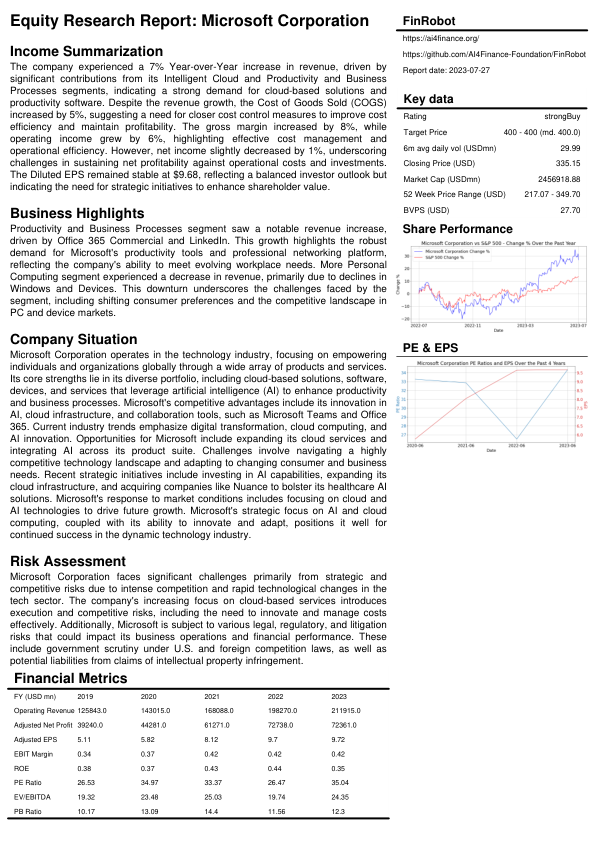

In [10]:
import io
import fitz
from PIL import Image


pdf = fitz.open("../report/Microsoft_Annual_Report_2023.pdf")
page = pdf.load_page(0)
pix = page.get_pixmap()

# Convert the Pixmap to a PIL Image
img = Image.open(io.BytesIO(pix.tobytes("png")))
display(img)